# Neptune a-e plot for TNOs and Centaurs

Plot eccentricty (e) versus semi-major axis (a) for TNOS using data from the Minor Planet Center.

We retrieve data from the MPC database using `astroquery`

TNOs and Centaurs are defined here as all objects with a>20au, but Centaurs have q>5.2au (orbit of Jupiter)

In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# astropy and astroquery

from astroquery.mpc import MPC
from astroquery.jplhorizons import Horizons

from astropy.time import Time

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

#### Figure Filename

`figName` sets the figure filename of the form `Fig<chapterNum>_<figNum>`, the figure number may also 
include a lowercase  letter for a subfigure (e.g., Fig1_2a).  

#### Aspect Ratio

`aspect` sets the aspect ratio, width/height.  The default aspect ratio is 4:3, 1:1 for square plots, 
and 5:2 (2.5:1) for spectra, and equal aspect ratio for images and plots of Cartesian coordinates.
Use a formula instead of decimal when the result is a fraction (example: `aspect = 4.0/3.0` instead of
`aspect=1.33`).

In [2]:
figName = 'TNOs_Neptune_ae' 

# Aspect ratio
#
# Exceptions:
#    spectra use full width we use 5:2=2.5 aspect ratio
#
# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3
aspect = 16.0/9.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 1.0

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## convenience functions

a_pq(a_p,p,q) = semi-major axis of a p:q resonance for perturber at a_p


In [3]:
def a_pq(a_p,p,q):
    return a_p*(p/q)**(2./3.)

## Get data using `astroquery`

If you have astroquery installed, you can query the MPC orbit database directly.

Extract:
 * `semimajor_axis` - $a$
 * `eccentricity` - $e$
 * `inclination` - $i$
 * `argument_of_perihelion` - $\varpi$
 * `ascending_node` - $\Omega$
 * `mean_anomaly` - $M$
 * `epoch_jd` - epoch in JD (easier to work with)
 * `mean_daily_motion` - $n$

In [4]:
aMin = 20.0
aMax = 130.0

result = MPC.query_objects('asteroid',
                           semimajor_axis_min=aMin,
                           semimajor_axis_max=aMax,
                           return_fields='semimajor_axis,eccentricity')
                           
aOuter = np.array([float(d.get('semimajor_axis',None)) for d in result])
eOuter = np.array([float(d.get('eccentricity',None)) for d in result])

print(f'Number of outer solar system objects from MPC: {len(aOuter)}')

Number of outer solar system objects from MPC: 5330


## Neptune and dwarf planets orbital data

Data from the NASA/JPL Solar System Dynamics database retrieved with `astroquery`


In [5]:
# viewing epoch for the plot

viewDate = "2025-02-02T00:00:00" # UTC
t = Time(viewDate,format='isot',scale='tt') # astropy time object
viewEpoch = t.decimalyear
viewJD = t.jd

# neptune orbit elements

obj = Horizons(id='Neptune Barycenter',epochs=viewJD)
el = obj.elements()

aNep = el['a'].value[0]
eNep = el['e'].value[0]
iNep = np.radians(el['incl'].value[0])
PNep = el['P'].value[0]/365.25 # years

# dwarf planet a, e, i

dwarfs = ['Pluto','Eris','Haumea','Makemake','Gonggong','Orcus','Quaoar']

# Horizons unique IDs

uniqID = ["9","20136199","20136108","Makemake","Gonggong","20090482","20050000"]

aDwarfs = {}
eDwarfs = {}
iDwarfs = {}
for i in range(len(dwarfs)):
    key = dwarfs[i]
    obj = Horizons(id=uniqID[i],epochs=viewJD)
    el = obj.elements()
    aDwarfs[key] = el['a'].value[0]
    eDwarfs[key] = el['e'].value[0]
    iDwarfs[key] = np.radians(el['incl'].value[0])

# limits

eMin = 0.0
eMax = 1.0

## Make the Plot



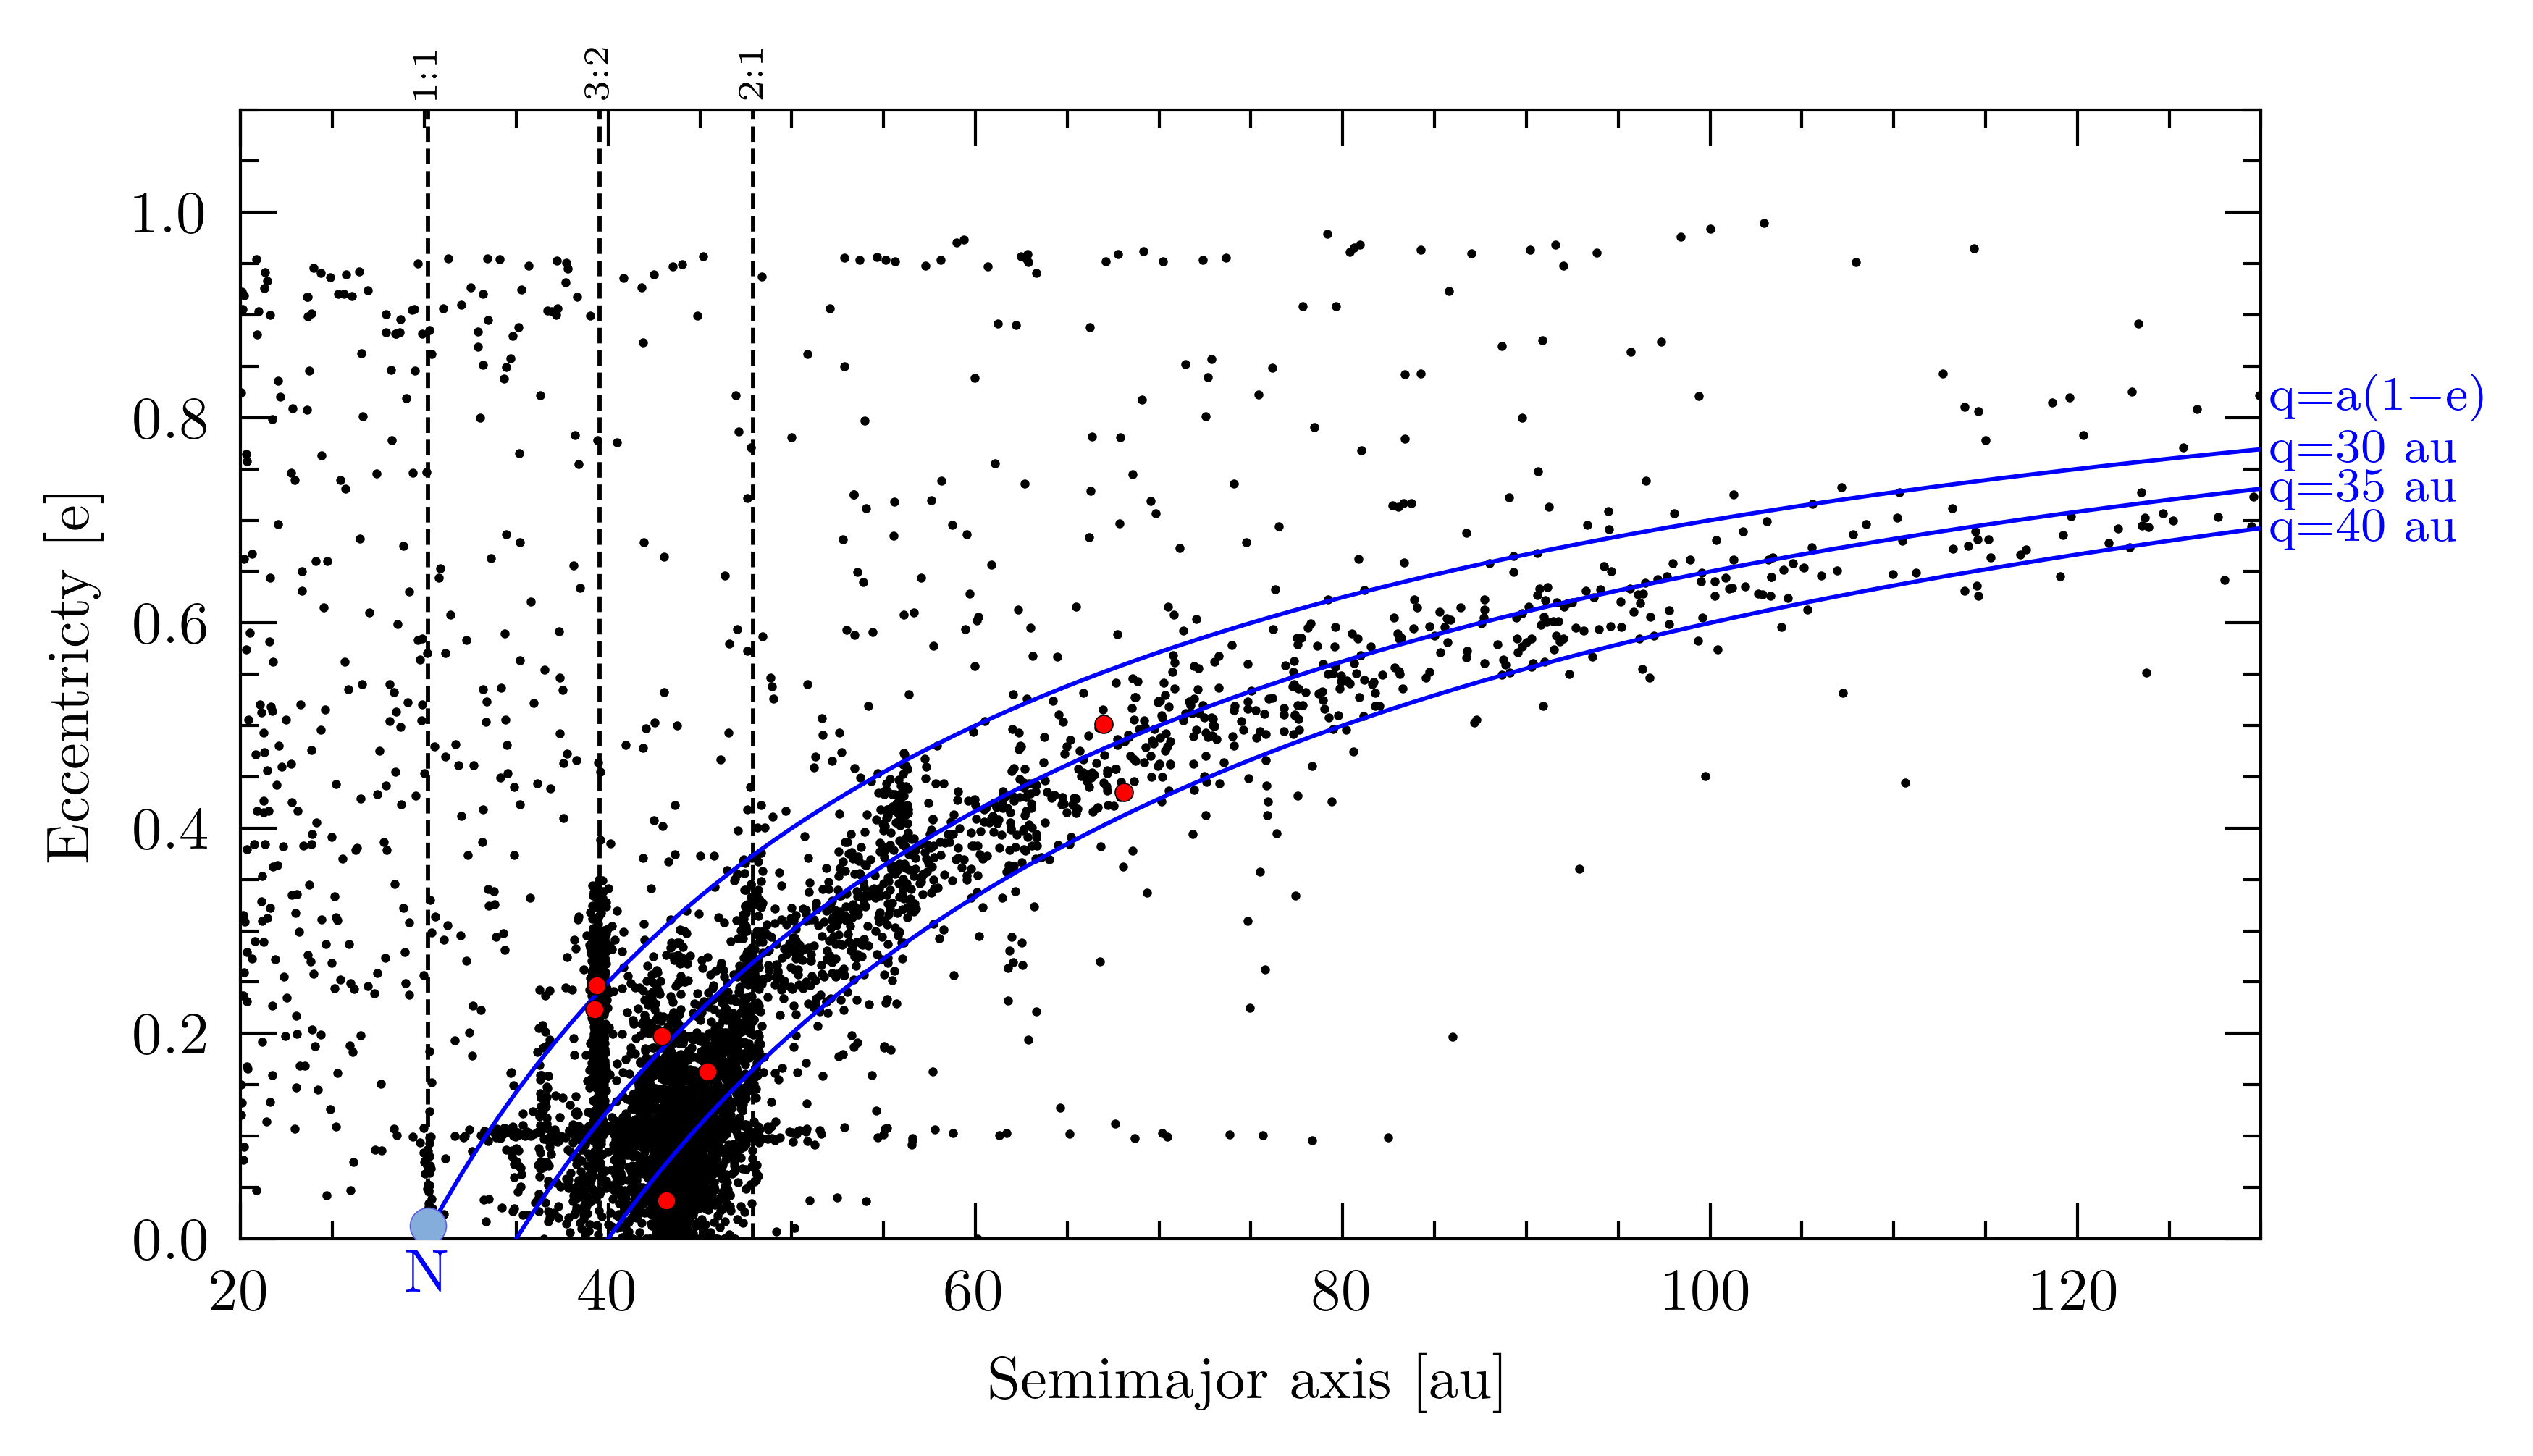

In [6]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

eMin = 0.0
eMax = 1.1

ax.set_xlim(aMin,aMax)
ax.xaxis.set_major_locator(MultipleLocator(20.0))
ax.xaxis.set_minor_locator(MultipleLocator(5.0))
ax.set_xlabel(r'Semimajor axis [au]',fontsize=axisFontSize)

ax.set_ylim(eMin,eMax)
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_ylabel(r'Eccentricty [e]',fontsize=axisFontSize)

ax.plot(aOuter,eOuter,'o',ms=1.5,mfc='black',mec=None,mew=0.0,zorder=8)

# plot lines of constant q = [30,35,40]au

aLab = 122.0
for q in [30,35,40]:
    aq = np.linspace(q,aMax,101)
    eq = 1.0 - (q/aq)
    ax.plot(aq,eq,'-',color='blue',lw=0.7,zorder=10)
    eLab = (1.0 - (q/aMax))
    if q == 30:
        ax.text(aMax+0.5,0.82,r'q=a(1$-$e)',ha='left',va='center',fontsize=8,color='blue')
    qLab = f'q={q} au'
    ax.text(aMax+0.5,eLab,qLab,ha='left',va='center',fontsize=8,color='blue')
    
# location of Neptune and the dwarf planets

ax.plot(aNep,eNep,'o',mec='#5b5ddf',mfc='#85addb',ms=6,mew=0.2,zorder=10)
ax.text(aNep,-0.01,'N',ha='center',va='top',fontsize=10,color='blue')

for dwarf in dwarfs:
    ax.plot(aDwarfs[dwarf],eDwarfs[dwarf],'o',mfc='red',mec='black',ms=3,mew=0.2,zorder=10)
    
# Neptune mean-motion resonances

# First-order resonances (3:2 and 2:1 that bracket KBOs, 4:3)

aN32 = a_pq(aNep,3,2)
aN21 = a_pq(aNep,2,1)
aN43 = a_pq(aNep,4,3)
aN54 = a_pq(aNep,5,4)

# higher-order resonsances

aN52 = a_pq(aNep,5,2)
aN53 = a_pq(aNep,5,3)

ax.vlines([aNep,aN32,aN21],eMin,eMax,ls=['--'],colors=['black'],lw=0.7,zorder=5)
ax.text(aNep,eMax+0.01,'1:1',ha='center',va='bottom',fontsize=6,color='black',rotation=90)
ax.text(aN32,eMax+0.01,'3:2',ha='center',va='bottom',fontsize=6,color='black',rotation=90)
ax.text(aN21,eMax+0.01,'2:1',ha='center',va='bottom',fontsize=6,color='black',rotation=90)

plt.savefig(plotFile,bbox_inches='tight',facecolor='white')

plt.show()